# 随机森林波士顿房价预测模型
姓名：邹子涵 学号：202020085400139

## 一、导入数据集及数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 从sklearn中导入随机森林回归算法
from sklearn.ensemble import RandomForestRegressor
# 导入波士顿房价数据集
from sklearn.datasets import load_boston
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
dfboston = pd.DataFrame(boston['data'],columns=boston['feature_names'])
dfboston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


查看数据集大小，数据集大小为（506 X 13）

In [4]:
dfboston.shape

(506, 13)

通过info函数可以看到该数据集中没有缺失值

In [5]:
dfboston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
dfboston.describe({0.01,0.99})

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
1%,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
99%,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 二、数据探索

数据集特征值解释：
* CRIM：按城市划分的人均犯罪率
* ZN：在超过25000平方英尺的地段华为居住用地的ZN比例
* INDUS：每市镇非零售商业用地的工业比重
* CHAS：布尔值（tract bounds river？）
* NOX：氮氧化物浓度
* RM：每件住宅的平均房间数目
* AGE：业主自主单位在1940年以前建造的楼龄比例
* DIS：分配到五个波士顿就业中心的距离
* RAD：辐射高速公路可达性快速增长指数
* TAX：每10000美元的全价值物业税税率
* PTRATIO：按市值划分的学生-教师比例
* B:按城镇划分的黑人比例
* LSTAT：人口减少的状态

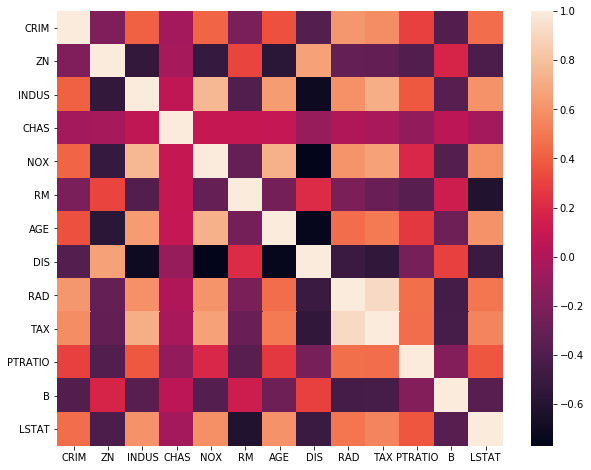

In [7]:
# 查看特征值相关性

plt.figure(figsize=(10,8))
sns.heatmap(dfboston.corr())

In [8]:
dfboston.corr()[np.abs(dfboston.corr())>0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,0.582764,NaN,NaN,NaN
ZN,NaN,1.000000,-0.533828,NaN,-0.516604,NaN,-0.569537,0.664408,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,-0.533828,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,0.595129,0.720760,NaN,NaN,0.603800
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,-0.516604,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,0.590879
RM,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808
AGE,NaN,-0.569537,0.644779,NaN,0.731470,NaN,1.000000,-0.747881,NaN,0.506456,NaN,NaN,0.602339
DIS,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,-0.534432,NaN,NaN,NaN
RAD,0.625505,NaN,0.595129,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN
TAX,0.582764,NaN,0.720760,NaN,0.668023,NaN,0.506456,-0.534432,0.910228,1.000000,NaN,NaN,0.543993


从上表可以看出：
* 相关性绝对值大于0.9的特征值为：TAX与RAD  
* 相关性绝对值大于0.7的特征值为：INDUS与NOX、DIS、TAX，NOX与AGE、DIS，AGE与DIS
* 相关性绝对值大于0.6的特征值为：AGE与INDUS，DIS与ZN，RAD与CRIM、NOX， TAX与NOX，LSTAT与INDUS、RM、AGE

In [9]:
# 加入房价标签，探索特征与标签的关系

dfboston['Price'] = pd.Series(boston['target'])
dfboston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


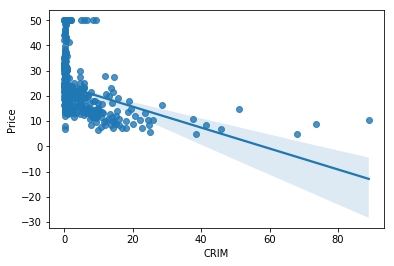

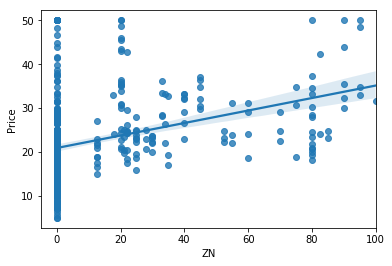

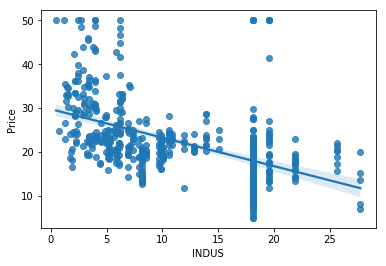

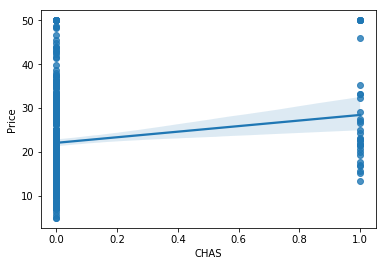

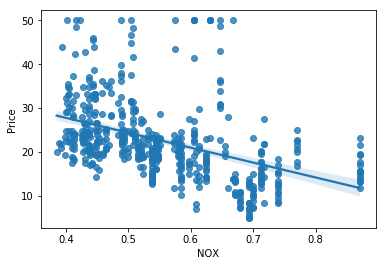

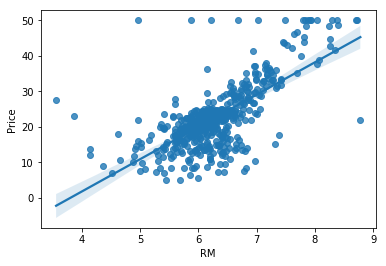

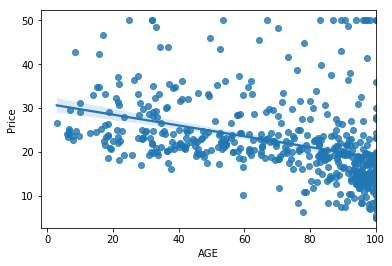

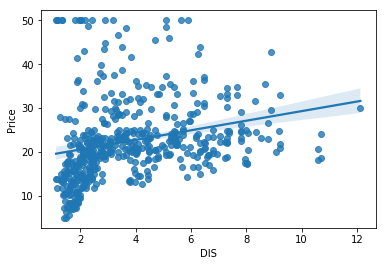

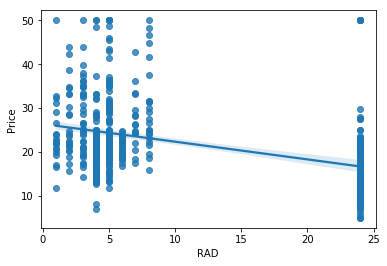

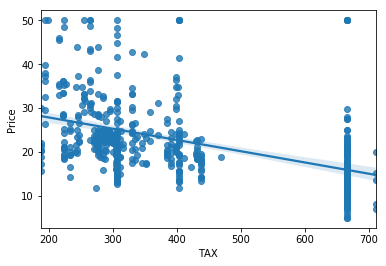

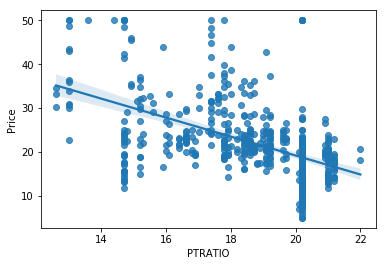

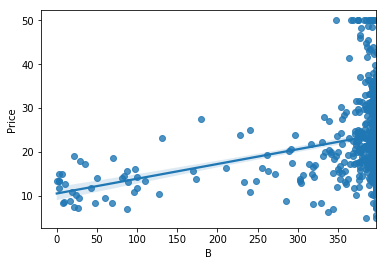

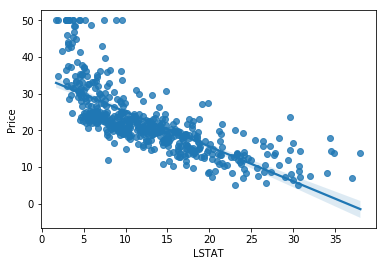

In [10]:
for feature in boston['feature_names']:
    sns.regplot(x=feature,y='Price',data=dfboston)
    plt.xlabel(feature)
    plt.show()

## 三、随机森林模型构建与回归

In [11]:
# 初步设置

Xtrain,Xtest,Ytrain,Ytest = train_test_split(dfboston.iloc[:,:-1],dfboston.iloc[:,-1],test_size=0.2)

rfr_0 = RandomForestRegressor(n_estimators=10)
rfr_0.fit(Xtrain,Ytrain)
print(rfr_0.score(Xtrain,Ytrain))
print(rfr_0.score(Xtest,Ytest))

0.9737876870796668
0.8455933421635065


In [12]:
from sklearn.model_selection import cross_val_score

# 调节参数n_estimators
score = []
for n in range(1,100):
    rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1)
    rfrscore=cross_val_score(rfr,boston.data,boston.target,cv=6).mean()
    score.append(rfrscore)

In [13]:
print(max(score),score.index(max(score)))

0.6671249554522204 67


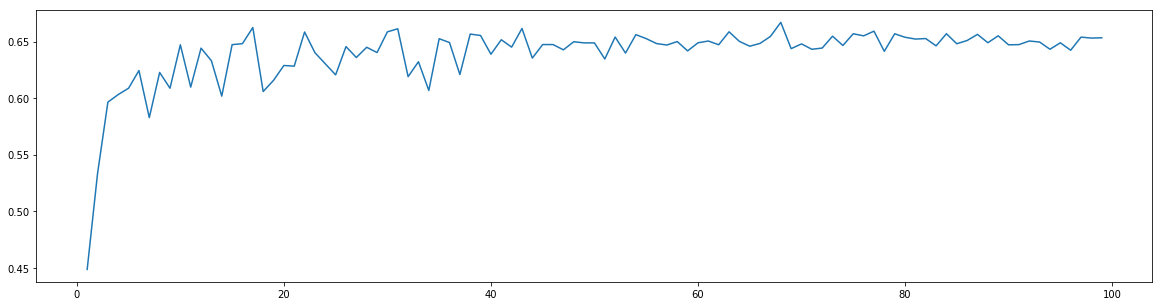

In [14]:
plt.figure(figsize=(20,5))
plt.plot(range(1,100),score)

In [15]:
rfr_1 = RandomForestRegressor(n_estimators=48)
rfr_1.fit(Xtrain,Ytrain)
print(rfr_1.score(Xtrain,Ytrain))
print(rfr_1.score(Xtest,Ytest))

0.9812381494730231
0.8504340818734535


In [16]:
rfr_1.feature_importances_

array([0.02586388, 0.00116509, 0.00747865, 0.00178758, 0.02683045,
       0.35880158, 0.01136469, 0.06865811, 0.00396633, 0.016905  ,
       0.01208554, 0.01037865, 0.45471445])

查看测试集结果

In [17]:
# 查看测试集结果
preds = rfr_0.predict(Xtest)
preds

array([20.03, 15.56, 43.16, 22.91, 20.27, 13.03, 28.18, 21.9 , 40.57,
       21.38, 21.59, 23.9 , 17.31, 10.81, 21.55, 15.04, 35.49, 24.26,
       14.66, 30.22, 24.86, 19.72, 24.08, 30.39, 23.93, 12.83, 19.38,
       30.94, 19.83, 13.61, 15.81, 19.92, 20.61, 13.91, 24.29, 24.15,
       27.34, 28.64, 26.09, 18.25, 14.82, 45.43, 19.77, 17.54, 44.51,
       31.76, 23.47, 20.19, 31.21, 15.01, 19.12, 21.34, 31.09, 13.23,
       22.35, 20.54, 34.76, 12.39, 20.67, 15.72, 43.39, 27.21, 13.97,
       16.29, 20.2 , 17.01, 22.8 , 16.11, 20.14, 30.32, 14.99, 16.19,
       45.36, 25.63, 32.6 , 25.46, 41.75, 16.92, 14.38, 21.16, 22.45,
       11.92, 21.65, 21.07, 20.74, 27.73, 22.84, 32.31, 20.85, 10.28,
        9.5 , 22.08, 23.79, 30.21, 19.24, 49.2 , 19.28, 19.88, 11.7 ,
       21.74, 22.32, 19.48])

In [18]:
Y_test = Ytest.values
Y_test

array([23.1, 16.4, 44.8, 21.2, 19.3, 15.6, 30.7, 23.2, 42.8, 21.7, 23.4,
       24.8, 19.5,  9.6, 20.6, 16.7, 37.3, 22.3, 23.2, 22.8, 23.2, 19.3,
       24.1, 31. , 21.9, 10.2, 15.6, 32.2, 22.7, 13.5, 15.6, 21.9, 16. ,
       14.5, 23. , 24.7, 27. , 30.1, 29.9, 20.6, 17.8, 21.9, 15. , 16.2,
       50. , 32. , 24.1, 18.4, 31.5, 14. , 19.2, 22.2, 28.5, 11.8, 21.7,
       19.7, 35.4, 14.4, 18.5, 12.6, 42.3, 25.1, 11.7, 14.3, 21.7, 23.7,
       18.6, 16.1, 15.3, 30.3, 13.1, 23.1, 48.3, 25. , 41.3, 21. , 44. ,
       13.9, 12.5, 20. , 26.4,  9.5, 22.3, 20.6, 18.9, 29.8, 22.4, 33.1,
       21.2,  8.3,  7.5, 21.5, 23.1, 31.6, 16.6, 50. , 19.4, 18.7, 12.8,
       22.6, 20.1, 22.5])

通过均方根误差评估预测效果

In [19]:
# 通过均方根误差评估预测效果
rmse = np.sqrt(np.mean(np.power((np.array(Ytest)-np.array(preds)),2)))
rmse

3.527950579885955

通过绘图直观地观察预测情况

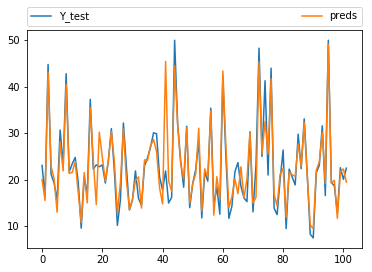

In [20]:
plt.plot(Y_test,label="Y_test")
plt.plot(preds,label="preds")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

计算基尼系数

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=3, min_samples_leaf=1)
dtf.fit(Xtrain,  Ytrain.astype('int'))

DecisionTreeClassifier(max_depth=4, min_samples_split=3)